<a href="https://colab.research.google.com/github/Neetu24/Air-Quality-Prediction/blob/main/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows:
        city        date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad  30-11-2020    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad  01-12-2020    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad  02-12-2020    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad  03-12-2020    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad  04-12-2020    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm10    nh3  
0   72.13   8.36  
1  154.53  27.36  
2  172.63  28.12  
3  202.15  36.48  
4  205.80  40.53  

Columns:
Index(['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10',
       'nh3'],
      dtype='object')

Missing values per column:
city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 c

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70q509mw/6jdm1g3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70q509mw/l46b471u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31761', 'data', 'file=/tmp/tmp70q509mw/6jdm1g3v.json', 'init=/tmp/tmp70q509mw/l46b471u.json', 'output', 'file=/tmp/tmp70q509mw/prophet_modelhj4t2xyk/prophet_model-20250801043132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Mean Absolute Error (MAE): 0.6111
Root Mean Square Error (RMSE): 0.8081
R-squared (R2): -0.2084


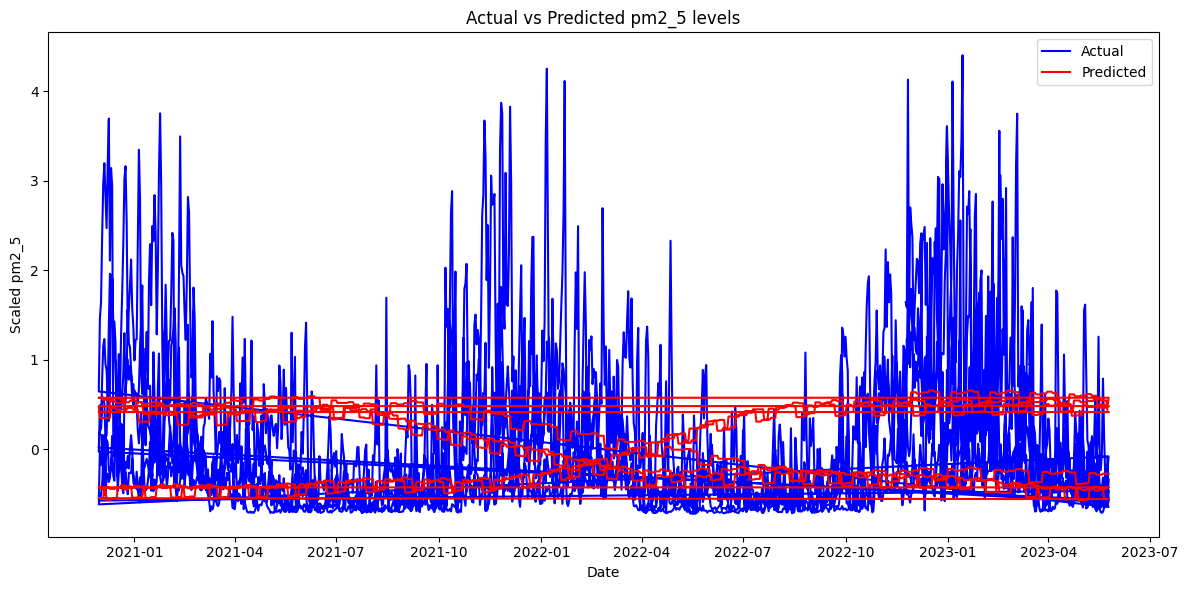


✅ All steps completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/air_pollution_data.csv', sep=',')
print("First few rows:")
print(df.head())
print("\nColumns:")
print(df.columns)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nInfo:")
print(df.info())
print("\nStatistics:")
print(df.describe())
df.replace(-200, np.nan, inplace=True)
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)
df['Datetime'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df_prophet = df[['Datetime', 'pm2_5']].rename(columns={'Datetime': 'ds', 'pm2_5': 'y'})
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]
model = Prophet()
model.fit(train_df)
future = test_df[['ds']]
forecast = model.predict(future)
predicted = forecast['yhat'].values
actual = test_df['y'].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
plt.figure(figsize=(12,6))
plt.plot(test_df['ds'], actual, label='Actual', color='blue')
plt.plot(test_df['ds'], predicted, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Scaled pm2_5')
plt.title('Actual vs Predicted pm2_5 levels')
plt.legend()
plt.tight_layout()
plt.show()
print("\n✅ All steps completed successfully!")
